In [1]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for text processing
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# to display images
from skimage import io

# to save the required files
import pickle

import warnings
warnings.filterwarnings('ignore') # To prevent kernel from showing any warning

In [2]:
df = pd.read_csv("movies.csv")
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,76600,Avatar: The Way of Water,Science Fiction-Adventure-Action,en,Set more than a decade after the events of the...,9366.788,20th Century Studios-Lightstorm Entertainment,2022-12-14,350000000.0,2.312336e+09,192.0,Released,Return to Pandora.,7.751,6748.0,Sam Worthington-Zoe Saldaña-Sigourney Weaver-S...,loss of loved one-dying and death-alien life-f...,/t6HIqrRAclMCA60NsSmeqe9RmNV.jpg,/s16H6tpK2utvwDtzZ8Qy4qm5Emw.jpg,183392-111332-702432-505642-1064215-436270-874...
1,502356,The Super Mario Bros. Movie,Animation-Adventure-Family-Fantasy-Comedy,en,While working underground to fix a water main ...,5132.098,Universal Pictures-Illumination-Nintendo,2023-04-05,100000000.0,5.800000e+07,92.0,Released,NaN,7.556,332.0,Chris Pratt-Anya Taylor-Joy-Charlie Day-Jack B...,video game-plumber-magic mushroom-based on vid...,/qNBAXBIQlnOThrVvA6mA2B5ggV6.jpg,/iw0Na1UBHgA5BgifwmQ8vKhlWgA.jpg,NaN
2,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4704.903,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,4.732379e+08,125.0,Released,Witness the beginning of a new dynasty.,6.448,1547.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/ngl2FKBlU4fhbdsrtdom9LVLBXw.jpg,/3CxUndGhUcZdt1Zggjdb2HkLLQX.jpg,965839-734048-267805-1035806-823999-842942-772...
3,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,2.690000e+08,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...
4,631842,Knock at the Cabin,Horror-Mystery-Thriller,en,While vacationing at a remote cabin a young gi...,3422.537,Blinding Edge Pictures-Universal Pictures-Film...,2023-02-01,20000000.0,5.200000e+07,100.0,Released,Save your family or save humanity. Make the ch...,6.457,888.0,Dave Bautista-Jonathan Groff-Ben Aldridge-Kris...,based on novel or book-sacrifice-cabin-faith-e...,/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,/zWDMQX0sPaW2u0N2pJaYA8bVVaJ.jpg,1058949-646389-772515-505642-143970-667216-104...


In [3]:
# berapa besar data?
df.shape

(722924, 20)

In [4]:
# apa saja tipe data pada tiap kolom?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722924 entries, 0 to 722923
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722924 non-null  int64  
 1   title                 722920 non-null  object 
 2   genres                511964 non-null  object 
 3   original_language     722924 non-null  object 
 4   overview              604275 non-null  object 
 5   popularity            722924 non-null  float64
 6   production_companies  337165 non-null  object 
 7   release_date          670287 non-null  object 
 8   budget                722924 non-null  float64
 9   revenue               722924 non-null  float64
 10  runtime               688439 non-null  float64
 11  status                722924 non-null  object 
 12  tagline               108068 non-null  object 
 13  vote_average          722924 non-null  float64
 14  vote_count            722924 non-null  float64
 15  

In [5]:
# apa ada data yang hilang?
df.isnull().sum()

id                           0
title                        4
genres                  210960
original_language            0
overview                118649
popularity                   0
production_companies    385759
release_date             52637
budget                       0
revenue                      0
runtime                  34485
status                       0
tagline                 614856
vote_average                 0
vote_count                   0
credits                 225156
keywords                512677
poster_path             185373
backdrop_path           500485
recommendations         688223
dtype: int64

In [6]:
# apa ada data yang sama?
df.duplicated().sum()

0

Observasi:
1. Ada 700.000 data dan 20 kolom
2. Data mengandung 6 numeric kolom dan 14 object/string kolom
3. Banyak kolom yang hilang
4. Tidak ada data yg duplikat

## Preprocessing

In [7]:
# lets get rid of the duplicate values
df.drop_duplicates(inplace=True)

In [8]:
df['title'].duplicated().sum()

147561

In [9]:
df[['title','release_date']].duplicated().sum()

62844

In [10]:
# lets get rid of the duplicate movies
df.drop_duplicates(subset=['title','release_date'], inplace=True)

In [11]:
df.shape

(660080, 20)

In [12]:
# filter film berdasarkan vote count harus lebih dari 100 vote
df1 = df[df.vote_count >= 100].reset_index()

In [13]:
df1.isnull().sum()

index                      0
id                         0
title                      0
genres                     4
original_language          0
overview                  36
popularity                 0
production_companies     382
release_date               0
budget                     0
revenue                    0
runtime                    0
status                     0
tagline                 4690
vote_average               0
vote_count                 0
credits                   51
keywords                1672
poster_path                1
backdrop_path             49
recommendations         1250
dtype: int64

In [14]:
# Replace the Nan with ''
df1.fillna('', inplace=True)

In [15]:
# finding index with '' genres and overview
index = df1[(df1['genres']=='') & (df1['overview']=='')].index

In [16]:
# droping those index
df1.drop(index, inplace=True)

genres, keywords and credits are seperated by '-'
So replacing that with space
and from credits only extracting first values words

In [17]:
df1['genres'] = df1['genres'].apply(lambda x: ' '.join(x.split('-')))
df1['keywords'] = df1['keywords'].apply(lambda x: ' '.join(x.split('-')))
df1['credits'] = df1['credits'].apply(lambda x: ' '.join(x.replace(' ', '').split('-')[:5]))

## Creating Tags

Lets create a column with all the important columns which describe a movie, so we can create tags out of it

In [18]:
df1['tags'] = df1['overview'] +' '+ df1['genres'] +' '+ df1['keywords'] +' '+ df1['credits'] +' '+ df1['original_language']

In [19]:
df1.tags[0]

'Set more than a decade after the events of the first film learn the story of the Sully family (Jake Neytiri and their kids) the trouble that follows them the lengths they go to keep each other safe the battles they fight to stay alive and the tragedies they endure. Science Fiction Adventure Action loss of loved one dying and death alien life form resurrection sequel dysfunctional family alien planet distant future adopted child rebirth family dynamics adopted son stronger villain war SamWorthington ZoeSaldaña SigourneyWeaver StephenLang KateWinslet en'

Let's apply stemming on tags column

📌 Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes.

In [20]:
stemmer = SnowballStemmer("english")
def stem(text):
    y = []
    
    for i in text.split():
        y.append(stemmer.stem(i))
        
    return ' '.join(y)

df1['tags'] = df1['tags'].apply(stem)

In [21]:
# Removing punctuation 
df1['tags'] = df1['tags'].str.replace('[^\w\s]','')

📌 TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

In [22]:
tfidf = TfidfVectorizer(stop_words='english')

In [23]:
tfidf_matrix = tfidf.fit_transform(df1['tags'])

In [24]:
df1.tags[0]

'set more than a decad after the event of the first film learn the stori of the sulli famili jake neytiri and their kids the troubl that follow them the length they go to keep each other safe the battl they fight to stay aliv and the tragedi they endure scienc fiction adventur action loss of love one die and death alien life form resurrect sequel dysfunct famili alien planet distant futur adopt child rebirth famili dynam adopt son stronger villain war samworthington zoesaldaña sigourneyweav stephenlang katewinslet en'

In [25]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title):
    # Get the index of the movie that matches the title
    idx = df1.index[df1['title'] == title][0]
    # show given movie poster
    try:
        a = io.imread(f'https://image.tmdb.org/t/p/w500/{df1.loc[idx, "poster_path"]}')
        plt.imshow(a)
        plt.axis('off')
        plt.title(title)
        plt.show()
    except:pass
    
    print('Recommendations\n')


    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    result = df1.iloc[movie_indices]
    
    # show reco. movie posters
    fig, ax = plt.subplots(2, 4, figsize=(15,15))
    ax=ax.flatten()
    for i, j in enumerate(result.poster_path):
        try:
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title)
            a = io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(a)
        except: pass
    fig.tight_layout()
    fig.show()

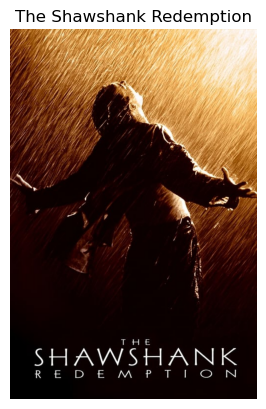

Recommendations



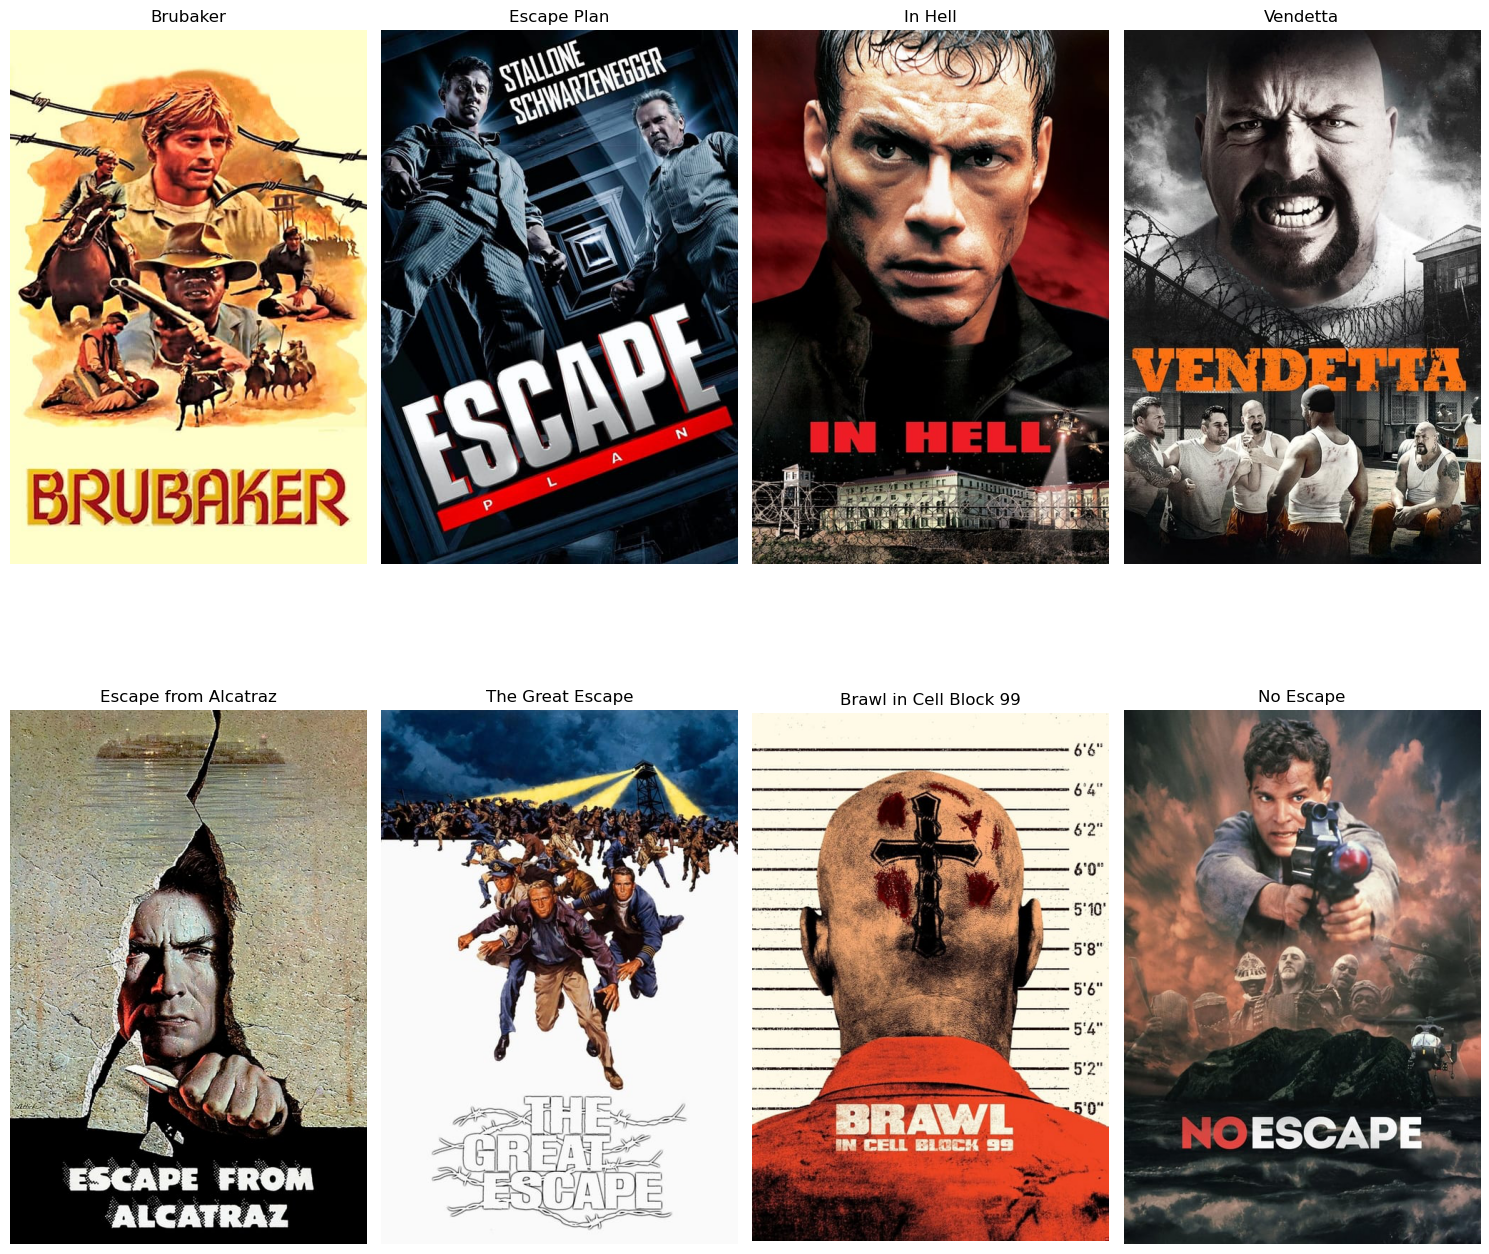

In [26]:
get_recommendations("The Shawshank Redemption")

In [27]:
pickle.dump(df1,open('model/movie_list.pkl','wb'))
pickle.dump(tfidf_matrix,open('model/tfidf_matrix.pkl','wb'))

In [28]:
%%writefile movie_recommendation_app.py

import pickle
import streamlit as st
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image

@st.cache
def get_recommendation(title):
    idx = df1.index[df1['title'] == title][0]
    poster = f'https://image.tmdb.org/t/p/w500/{df1.loc[idx, "poster_path"]}'

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:13]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    result = df1.iloc[movie_indices]

    recommended_movie_names = []
    recommended_movie_posters = []
    recommended_movie_overview = []

    for i, j in enumerate(result.poster_path):
        recommended_movie_names.append(result.iloc[i].title)
        recommended_movie_posters.append(f'https://image.tmdb.org/t/p/w500/{j}')
        recommended_movie_overview.append(result.iloc[i].overview)
    return poster, recommended_movie_names, recommended_movie_posters, recommended_movie_overview


image = Image.open('Movie recommender system.jpg')
st.image(image)

st.markdown('You might have wondered sometime or at some point that how do platforms like Netflix or AmazonPrime Video are able to recommend us TV shows or movies, what kind of an algorithm do these websites use to recommend us movies. Well as complicated or difficult as it might seem this is simply just a mixture of some machine learning algorithms with some Natural Language Processing. ')
st.markdown('There are two main techniques used in recommendation system, known as content-based filtering and collaborative filtering')
st.markdown('For this project I have used Content Based Recommendation System, It uses attributes such as genre, director, description, actors, etc. for movies, to make suggestions for the users. The intuition behind this sort of recommendation system is that if a user liked a particular movie or show, he/she might like a movie or a show similar to it.')

df1 = pickle.load(open('movie_list.pkl ', 'rb'))
tfidf_matrix = pickle.load(open('tfidf_matrix.pkl ', 'rb'))

movies_list = df1['title'].values
selected_movie = st.selectbox('Type and Choose The Movie',movies_list)

if st.button('Show Recommendation'):
    poster,recommended_movie_names,recommended_movie_posters,recommended_movie_overview = get_recommendation(selected_movie)
    st.image(poster,width=160)
    col1, col2, col3, col4 = st.columns(4)
    with col1:
        st.image(recommended_movie_posters[0])
        st.markdown(recommended_movie_names[0])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[0])

        st.image(recommended_movie_posters[4])
        st.markdown(recommended_movie_names[4])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[4])

        st.image(recommended_movie_posters[8])
        st.markdown(recommended_movie_names[8])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[8])

    with col2:
        st.image(recommended_movie_posters[1])
        st.markdown(recommended_movie_names[1])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[1])

        st.image(recommended_movie_posters[5])
        st.markdown(recommended_movie_names[5])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[5])

        st.image(recommended_movie_posters[9])
        st.markdown(recommended_movie_names[9])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[9])

    with col3:
        st.image(recommended_movie_posters[2])
        st.markdown(recommended_movie_names[2])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[2])

        st.image(recommended_movie_posters[6])
        st.markdown(recommended_movie_names[6])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[6])

        st.image(recommended_movie_posters[10])
        st.markdown(recommended_movie_names[10])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[10])

    with col4:
        st.image(recommended_movie_posters[3])
        st.markdown(recommended_movie_names[3])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[3])

        st.image(recommended_movie_posters[7])
        st.markdown(recommended_movie_names[7])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[7])

        st.image(recommended_movie_posters[11])
        st.markdown(recommended_movie_names[11])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[11])

Overwriting movie_recommendation_app.py


In [29]:
df.shape

(660080, 20)

In [30]:
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,76600,Avatar: The Way of Water,Science Fiction-Adventure-Action,en,Set more than a decade after the events of the...,9366.788,20th Century Studios-Lightstorm Entertainment,2022-12-14,350000000.0,2.312336e+09,192.0,Released,Return to Pandora.,7.751,6748.0,Sam Worthington-Zoe Saldaña-Sigourney Weaver-S...,loss of loved one-dying and death-alien life-f...,/t6HIqrRAclMCA60NsSmeqe9RmNV.jpg,/s16H6tpK2utvwDtzZ8Qy4qm5Emw.jpg,183392-111332-702432-505642-1064215-436270-874...
1,502356,The Super Mario Bros. Movie,Animation-Adventure-Family-Fantasy-Comedy,en,While working underground to fix a water main ...,5132.098,Universal Pictures-Illumination-Nintendo,2023-04-05,100000000.0,5.800000e+07,92.0,Released,NaN,7.556,332.0,Chris Pratt-Anya Taylor-Joy-Charlie Day-Jack B...,video game-plumber-magic mushroom-based on vid...,/qNBAXBIQlnOThrVvA6mA2B5ggV6.jpg,/iw0Na1UBHgA5BgifwmQ8vKhlWgA.jpg,NaN
2,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4704.903,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,4.732379e+08,125.0,Released,Witness the beginning of a new dynasty.,6.448,1547.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/ngl2FKBlU4fhbdsrtdom9LVLBXw.jpg,/3CxUndGhUcZdt1Zggjdb2HkLLQX.jpg,965839-734048-267805-1035806-823999-842942-772...
3,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,2.690000e+08,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...
4,631842,Knock at the Cabin,Horror-Mystery-Thriller,en,While vacationing at a remote cabin a young gi...,3422.537,Blinding Edge Pictures-Universal Pictures-Film...,2023-02-01,20000000.0,5.200000e+07,100.0,Released,Save your family or save humanity. Make the ch...,6.457,888.0,Dave Bautista-Jonathan Groff-Ben Aldridge-Kris...,based on novel or book-sacrifice-cabin-faith-e...,/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,/zWDMQX0sPaW2u0N2pJaYA8bVVaJ.jpg,1058949-646389-772515-505642-143970-667216-104...
